In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
import pandas as pd
import easydarkfigs
%matplotlib inline

In [2]:
%set_darkfigdir figures_dark/
%set_lightfigdir figures/

In [3]:
%%time
from results import models, results, pcmds, data, radii_am, radii_kpc, dmods, regions
import results as rr

M87
M87v2
M49
NGC3377
NGC4993
M31
M51
CPU times: user 2min 19s, sys: 2.22 s, total: 2min 22s
Wall time: 2min 22s


In [ ]:
rr.load_NGC4993()

In [ ]:
rr.load_NGC3377()

In [4]:
%%time
from drivers import filters, iso_models, drivers, sky

Loading Isochrone Models
CPU times: user 42.9 s, sys: 9.06 s, total: 52 s
Wall time: 53.8 s


GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.

In [4]:
def many_pcmd_compares(keys, axes=None):
    n = len(keys)
    if axes is None:
        fig, axes = plt.subplots(ncols=n, figsize=(5*(n+1), 6))
    for i, k in enumerate(keys):
        g = k.split('_')[0]
        a = axes[i]
        ppy.plotting.plot_pcmd_contours(data[k], color='k', alpha=0.5, label='Data', ax=a)
        if k not in pcmds:
            print(f'Modeling best fit for {k}')
            pcmds[k], _ = drivers[g].simulate(results[k].best_model, 128, sky_noise=sky[g], dither=False, mag_system=('ab' if g=='M31' else 'vega'))
        ppy.plotting.plot_pcmd_contours(pcmds[k], color='b', alpha=1.0, label='Model', ax=a)
        ppy.plotting.plot_isochrone(iso_models[g], axes=a, alpha=0.)
    fig.tight_layout()
    return fig, axes

In [6]:
plt.style.use('cook')

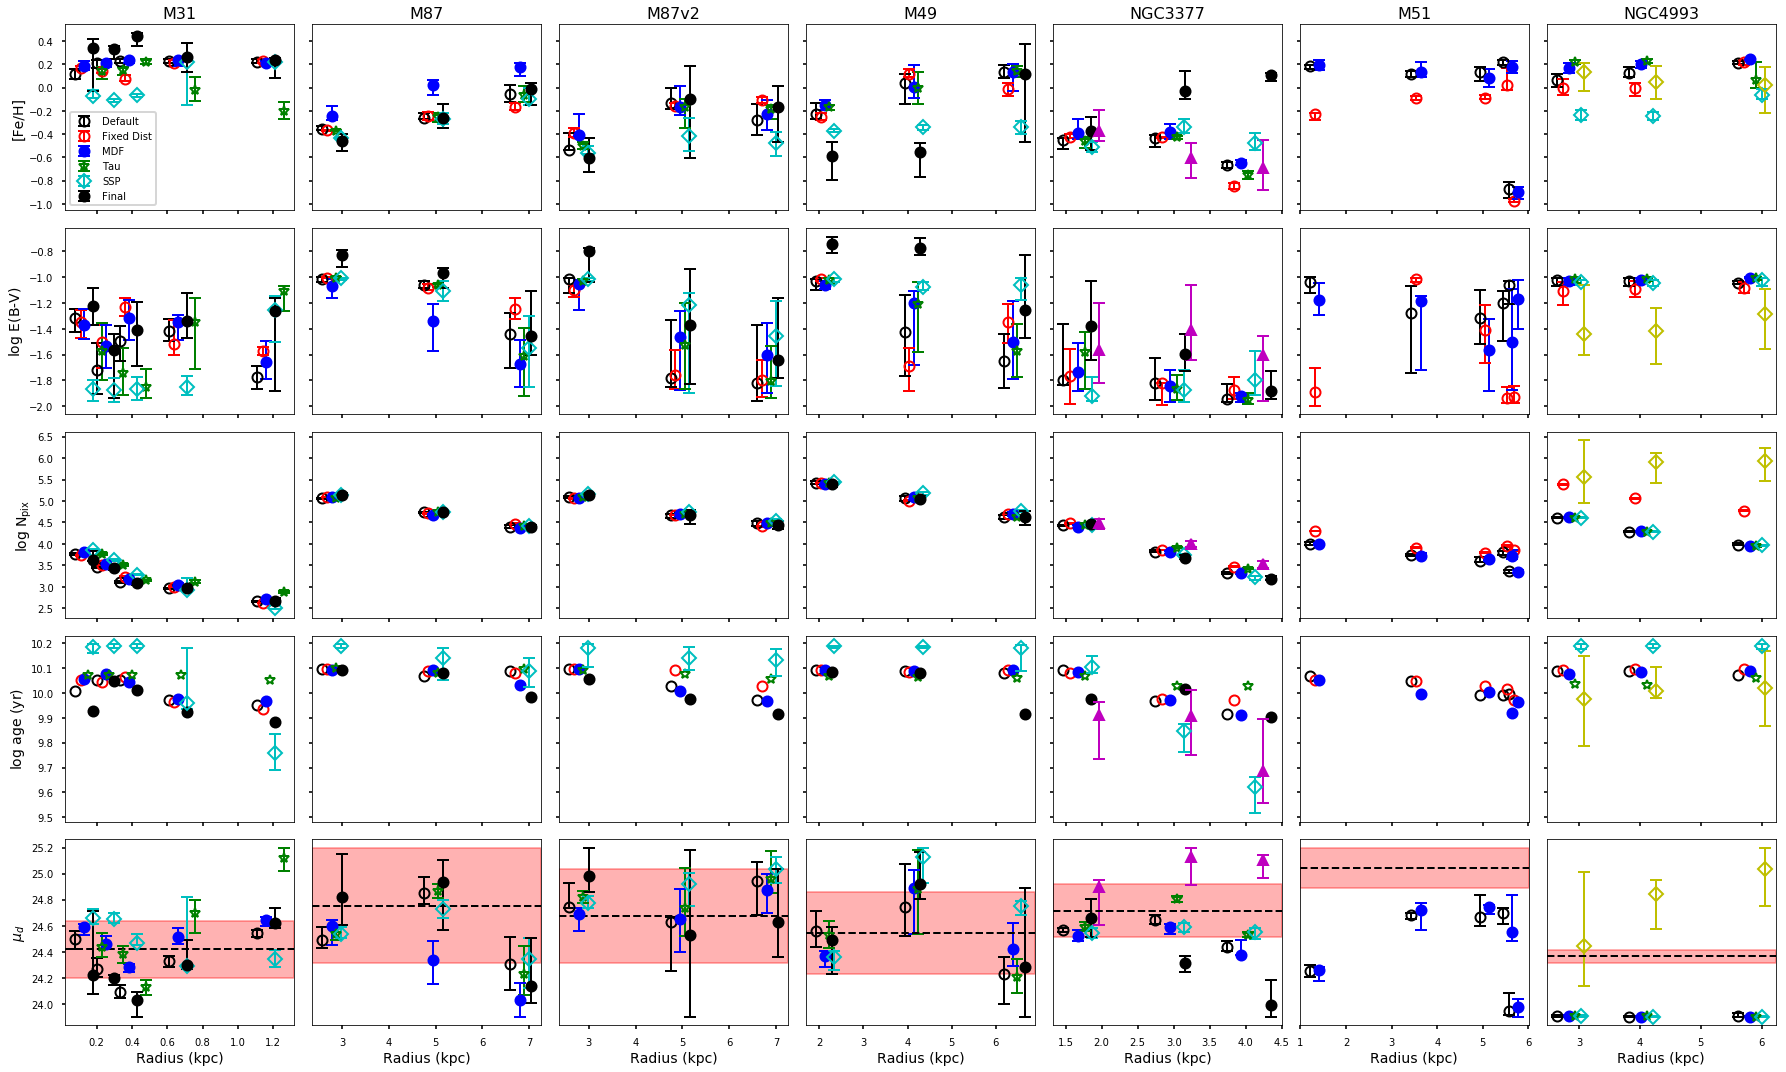

In [25]:
fig, axes = plt.subplots(ncols=7, nrows=5, figsize=(25, 15), sharex='col', sharey='row')
for a in axes[-1]:
    a._shared_y_axes.remove(a)
for i, g in enumerate(['M31', 'M87', 'M87v2', 'M49', 'NGC3377', 'M51', 'NGC4993']):
    a = axes[:,i]
    if g in ['M31', 'M51']:
        rs = ['a', 'b', 'c', 'd', 'e']
    else:
        rs = ['a1', 'b1', 'c1']
    for j, r in enumerate(rs):
        # Model 1
        k = f'{g}_{r}_m1'
        c,m,mfc = 'k','o','None'
        dx = (-0.05 if g=='M31' else -0.2)
        results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[4], a[2]], x=radii_kpc[k]+dx, color=c, marker=m, mfc=mfc, label=('Default' if j==0 else None))
        a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
        
        # Model 2
        k = f'{g}_{r}_m2'
        c,m,mfc = 'r','o','None'
        dx = (-0.02 if g=='M31' else -0.1)
        results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[2]], x=radii_kpc[k]+dx,  color=c, marker=m, mfc=mfc,  label=('Fixed Dist' if j==0 else None))
        a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
        
        # Model 3
        k = f'{g}_{r}_m3'
        c,m,mfc = 'b','o','b'
        dx = 0.
        results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[4], a[2]], x=radii_kpc[k]+dx,  color=c, marker=m, mfc=mfc,  label=('MDF' if j==0 else None))
        a[3].plot(radii_kpc[k], results[k].best_model.sfh_model.mean_age, color=c, marker=m, mfc=mfc,  ms=10)
        
        # Model 4
        #### REMOVE THIS SOON
        if g != 'M51':
            k = f'{g}_{r}_m4'
            c,m,mfc = 'g','*','None'
            dx = (0.02 if g=='M31' else 0.1)
            results[k].plot_errorbars([a[0], a[1], a[2], None, a[4]], x=radii_kpc[k]+0.1,  color=c, marker=m, mfc=mfc,  label=('Tau' if j==0 else None))
            a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
        
        # Model 5
        if g != 'M51':
            k = f'{g}_{r}_m5'
            c,m,mfc = 'c','D','None'
            dx = (0.05 if g=='M31' else 0.2)
            results[k].plot_errorbars(a, x=radii_kpc[k]+dx,  color=c, marker=m, mfc=mfc,  label=('SSP' if j==0 else None))
    #         a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age, marker='o', color='k', ms=10)

        # Model 6
        if g == 'NGC4993':
            k = f'{g}_{r}_m6'
            c,m,mfc = 'y','D','None'
            dx = (0.07 if g=='M31' else 0.25)
            results[k].plot_errorbars(a, x=radii_kpc[k]+dx,  color=c, marker=m, mfc=mfc,  label=('SSP' if j==0 else None))
    #         a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age, marker='o', color='k', ms=10)
        elif g != 'M51':
            k = f'{g}_{r}_m6'
            c,m,mfc = 'k','o','k'
            dx = (0.05 if g=='M31' else 0.2)
            results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[4], a[2]], x=radii_kpc[k]+dx, color=c, marker=m, mfc=mfc, label=('Final' if j==0 else None))
            a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)

        # Model 7
        if g == 'NGC3377':
            k = f'{g}_{r}_m7'
            c,m,mfc = 'm','^','m'
            dx = (0.07 if g=='M31' else 0.3)
            results[k].plot_errorbars(a, x=radii_kpc[k]+dx,  color=c, marker=m, mfc=mfc,  label=('SSP' if j==0 else None))
    #         a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age, marker='o', color='k', ms=10)

    a[-1].axhline(y=dmods[g], ls='--', color='k')
    a[-1].axhspan(dmods[g]-0.22, dmods[g]+0.22, color='r', alpha=0.3)
    a[0].set_title(g)
axes[0,0].legend(loc=0, fontsize=10)
for a in axes[-1]:
    a.set_xlabel('Radius (kpc)')
for i, a in enumerate(axes[:,0]):
    a.set_ylabel(results['M87_a1_m5'].labels[i])
fig.tight_layout()

# M31

In [35]:
for k in [k for k in results.keys() if 'M31' in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

M31_a_m1 4.611681492860953e-05 --DONE
M31_b_m1 0.004531120674528211 --DONE
M31_c_m1 0.0008204757432395127 --DONE
M31_d_m1 0.0007618114102569962 --DONE
M31_e_m1 0.006889994996754467 --DONE
M31_a_m2 2.2778795027988963e-07 --DONE
M31_b_m2 0.002519956670994361 --DONE
M31_c_m2 0.0006256293950173131 --DONE
M31_d_m2 2.9803032475683722e-05 --DONE
M31_e_m2 0.0008410899253021853 --DONE
M31_a_m3 0.0008141322500705428 --DONE
M31_b_m3 0.026522425539269534 --DONE
M31_c_m3 0.04929980809811241 --DONE
M31_d_m3 0.006715431582506426 --DONE
M31_e_m3 0.13642954171029942
M31_a_m4 1.9920630620617885e-06 --DONE
M31_b_m4 1.1431040547904558e-05 --DONE
M31_c_m4 5.064511515229242e-05 --DONE
M31_d_m4 5.6852513807825744e-09 --DONE
M31_e_m4 1.6034216514526634e-06 --DONE
M31_a_m5 0.0002079886412502674 --DONE
M31_b_m5 1.1987186553596985e-05 --DONE
M31_c_m5 4.817085937247612e-06 --DONE
M31_d_m5 4.731859007733874e-06 --DONE
M31_e_m5 2.7724581741495058e-08 --DONE
M31_a_m6 0.18211300622033377
M31_b_m6 0.17015923734857097


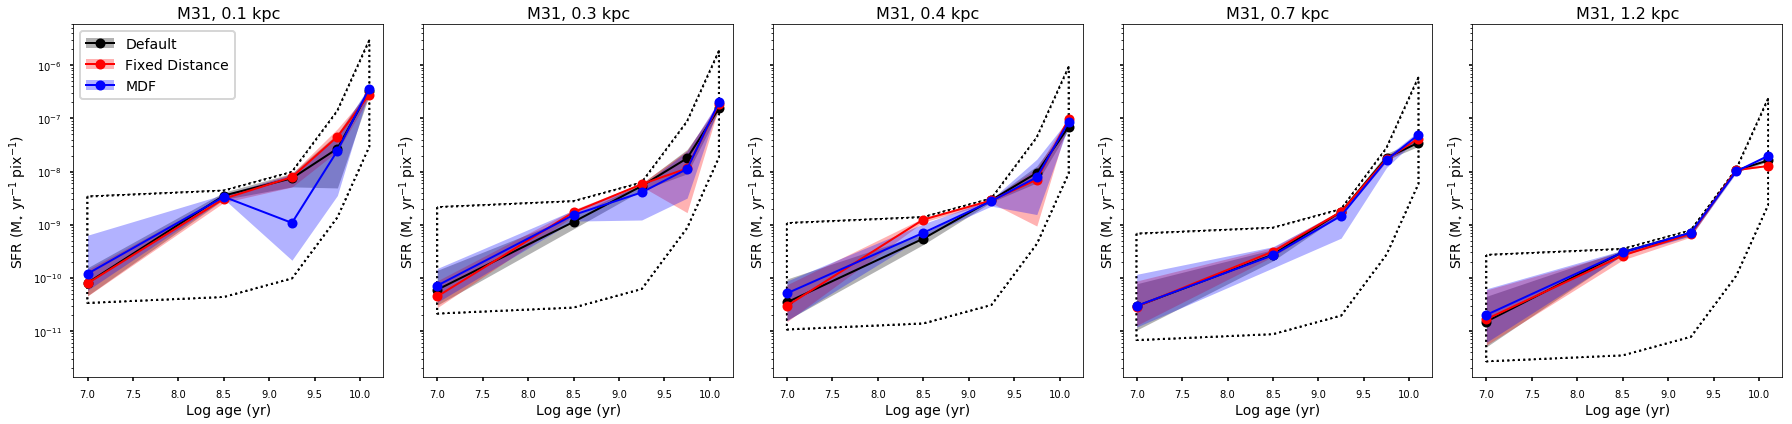

In [11]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 6), sharex=True, sharey=True)
for i, r in enumerate(['e','d','c','b','a']):
    ax = axes[i]
    ax, lines1 = results[f'M31_{r}_m1'].plot_sfr(ax=ax, color='k')
    ax, lines2 = results[f'M31_{r}_m2'].plot_sfr(ax=ax, color='r')
    ax, lines3 = results[f'M31_{r}_m3'].plot_sfr(ax=ax, color='b')
#     ax, lines4 = results[f'M31_{r}_m6'].plot_sfr(ax=ax, color='c')
    if i == 0:
#         ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2]), (lines4[0], lines4[2])), ('Default', 'Fixed Distance', 'MDF', 'Final'))
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2])), ('Default', 'Fixed Distance', 'MDF'))
    else:
        ax.get_legend().remove()
    k = f'M31_{r}_m1'
    ax.set_title(f'M31, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

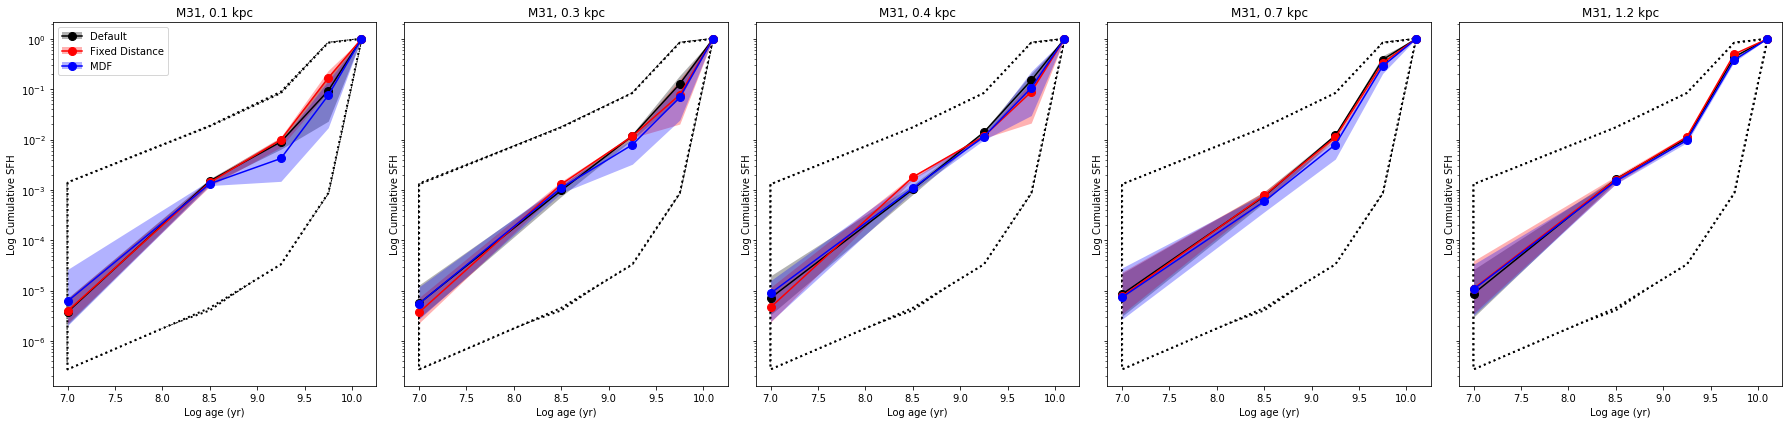

In [5]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 6), sharex=True, sharey=True)
for i, r in enumerate(['e','d','c','b','a']):
    ax = axes[i]
    ax, lines1 = results[f'M31_{r}_m1'].plot_cum_sfh(ax=ax, color='k')
    ax, lines2 = results[f'M31_{r}_m2'].plot_cum_sfh(ax=ax, color='r')
    ax, lines3 = results[f'M31_{r}_m3'].plot_cum_sfh(ax=ax, color='b')
#     ax, lines4 = results[f'M31_{r}_m6'].plot_sfr(ax=ax, color='c')
    if i == 0:
#         ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2]), (lines4[0], lines4[2])), ('Default', 'Fixed Distance', 'MDF', 'Final'))
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2])), ('Default', 'Fixed Distance', 'MDF'))
    else:
        ax.get_legend().remove()
    k = f'M31_{r}_m1'
    ax.set_title(f'M31, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

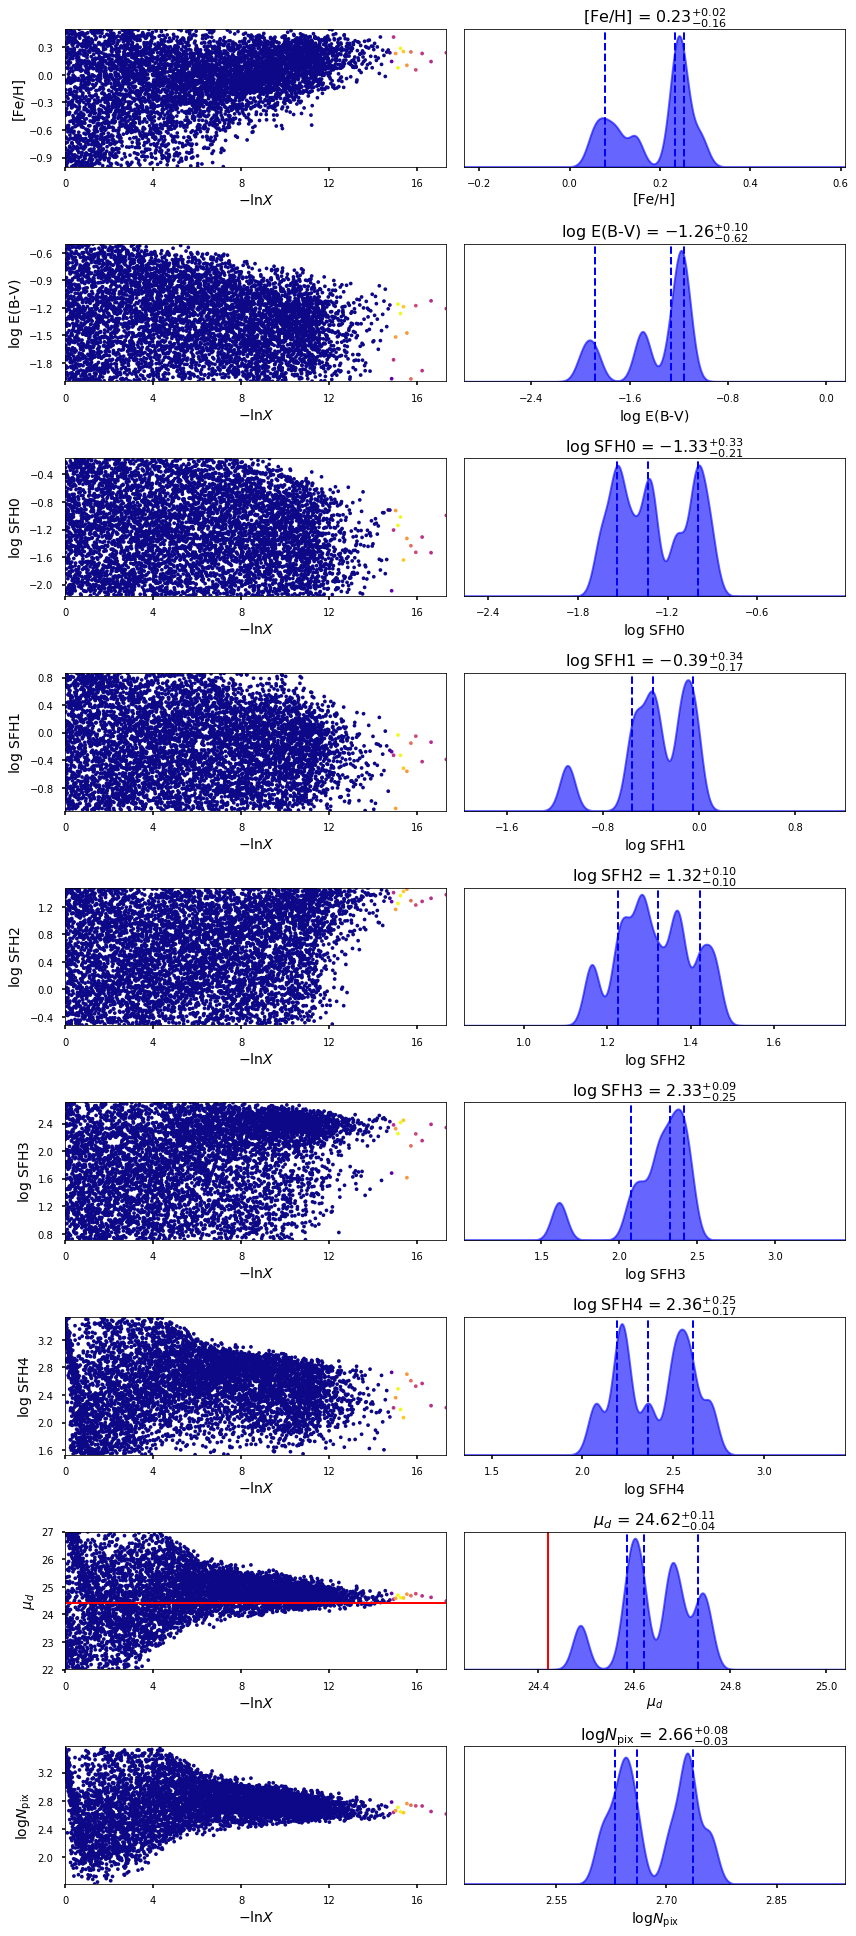

In [29]:
results['M31_a_m6'].plot_trace();

In [ ]:
fig, axes = many_pcmd_compares(['M31_a_m1', 'M31_b_m1', 'M31_c_m1', 'M31_d_m1', 'M31_e_m1'])

In [ ]:
fig, axes = many_pcmd_compares(['M31_a_m3', 'M31_b_m3', 'M31_c_m3', 'M31_d_m3', 'M31_e_m3'])

In [ ]:
fig, axes = many_pcmd_compares(['M31_a_m4', 'M31_b_m4', 'M31_c_m4', 'M31_d_m4', 'M31_e_m4'])

In [ ]:
fig, axes = many_pcmd_compares(['M31_a_m5', 'M31_b_m5', 'M31_c_m5', 'M31_d_m5', 'M31_e_m5'])

In [ ]:
results['M31_a_m1'].as_dynesty()['logz'][-1]

In [ ]:
results['M31_a_m2'].as_dynesty()['logz'][-1]

In [ ]:
results['M31_a_m3'].as_dynesty()['logz'][-1]

In [ ]:
results['M31_a_m4'].as_dynesty()['logz'][-1]

In [ ]:
results['M31_a_m5'].as_dynesty()['logz'][-1]

# M87

In [12]:
for k in [k for k in results.keys() if 'M87' in k and 'M87v2' not in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

M87_a1_m1 0.5162805347335961 --DONE
M87_b1_m1 0.07984997233830171 --DONE
M87_c1_m1 0.036580557660812474 --DONE
M87_a1_m2 0.00011793160298623206 --DONE
M87_b1_m2 0.0015483471860378017 --DONE
M87_c1_m2 0.0005326117419883758 --DONE
M87_a1_m3 0.3110162378699215 --DONE
M87_b1_m3 0.061829558162472154 --DONE
M87_c1_m3 0.05863948597755808 --DONE
M87_a1_m4 2.2104959640500965e-06 --DONE
M87_b1_m4 0.0019292875707819235 --DONE
M87_c1_m4 4.49216447151457e-05 --DONE
M87_a1_m5 1.4009350621790873e-06 --DONE
M87_b1_m5 0.0033791305336663413 --DONE
M87_c1_m5 0.0019324645720715239 --DONE
M87_a1_m6 0.16265323120617836
M87_b1_m6 0.15134811482496957
M87_c1_m6 0.13504353404917424


In [12]:
for k in [k for k in results.keys() if 'M87v2' in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

M87v2_a1_m1 0.31463350493095277 --DONE
M87v2_b1_m1 0.16090868146581272 --DONE
M87v2_c1_m1 0.08179017191058335
M87v2_a1_m2 0.0028546444976456087 --DONE
M87v2_b1_m2 0.042419057746286626
M87v2_c1_m2 0.001003095827130096 --DONE
M87v2_a1_m3 0.5273005484296931 --DONE
M87v2_b1_m3 0.03772076362623977 --DONE
M87v2_c1_m3 0.04120427617505129 --DONE
M87v2_a1_m4 2.8266890410577616e-06 --DONE
M87v2_b1_m4 6.74879546096463e-05 --DONE
M87v2_c1_m4 0.00017008464807588553 --DONE
M87v2_a1_m5 0.04264805879574851 --DONE
M87v2_b1_m5 0.018723833132753498 --DONE
M87v2_c1_m5 0.017162786804334473 --DONE
M87v2_a1_m6 0.13927512117740548
M87v2_b1_m6 0.12668520097909663
M87v2_c1_m6 0.10006097618398258


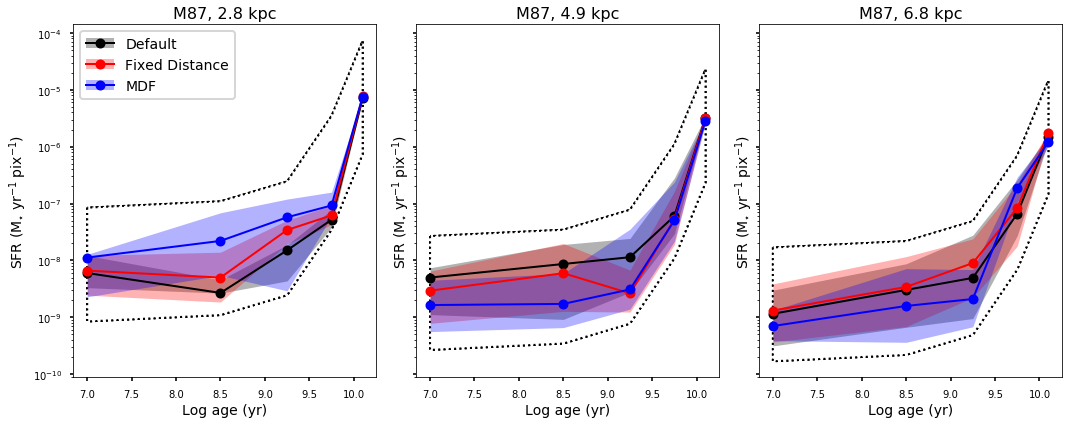

In [13]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6), sharex=True, sharey=True)
for i, r in enumerate(['a','b','c']):
    ax = axes[i]
    ax, lines1 = results[f'M87_{r}1_m1'].plot_sfr(ax=ax, color='k')
    ax, lines2 = results[f'M87_{r}1_m2'].plot_sfr(ax=ax, color='r')
    ax, lines3 = results[f'M87_{r}1_m3'].plot_sfr(ax=ax, color='b')
    if i == 0:
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2])), ('Default', 'Fixed Distance', 'MDF'))
    else:
        ax.get_legend().remove()
    k = f'M87_{r}1_m1'
    ax.set_title(f'M87, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

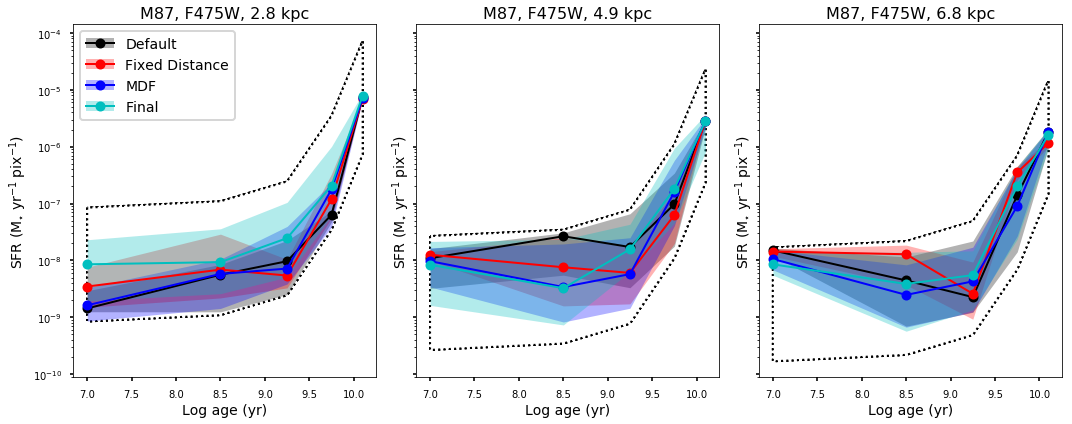

In [33]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6), sharex=True, sharey=True)
for i, r in enumerate(['a','b','c']):
    ax = axes[i]
    ax, lines1 = results[f'M87v2_{r}1_m1'].plot_sfr(ax=ax, color='k')
    ax, lines2 = results[f'M87v2_{r}1_m2'].plot_sfr(ax=ax, color='r')
    ax, lines3 = results[f'M87v2_{r}1_m3'].plot_sfr(ax=ax, color='b')
    ax, lines4 = results[f'M87v2_{r}1_m6'].plot_sfr(ax=ax, color='c')
    if i == 0:
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2]), (lines4[0], lines4[2])), ('Default', 'Fixed Distance', 'MDF', 'Final'))
    else:
        ax.get_legend().remove()
    k = f'M87v2_{r}1_m1'
    ax.set_title(f'M87, F475W, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

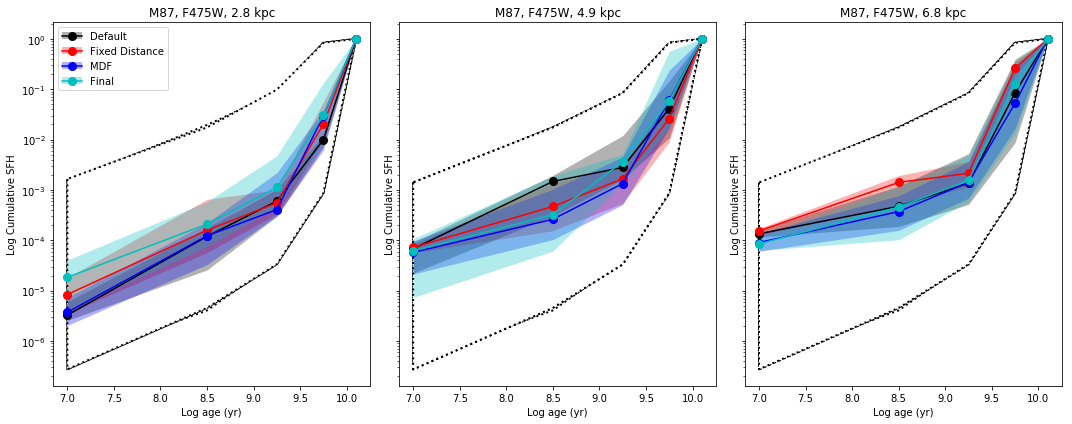

In [6]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6), sharex=True, sharey=True)
for i, r in enumerate(['a','b','c']):
    ax = axes[i]
    ax, lines1 = results[f'M87v2_{r}1_m1'].plot_cum_sfh(ax=ax, color='k')
    ax, lines2 = results[f'M87v2_{r}1_m2'].plot_cum_sfh(ax=ax, color='r')
    ax, lines3 = results[f'M87v2_{r}1_m3'].plot_cum_sfh(ax=ax, color='b')
    ax, lines4 = results[f'M87v2_{r}1_m6'].plot_cum_sfh(ax=ax, color='c')
    if i == 0:
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2]), (lines4[0], lines4[2])), ('Default', 'Fixed Distance', 'MDF', 'Final'))
    else:
        ax.get_legend().remove()
    k = f'M87v2_{r}1_m1'
    ax.set_title(f'M87, F475W, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

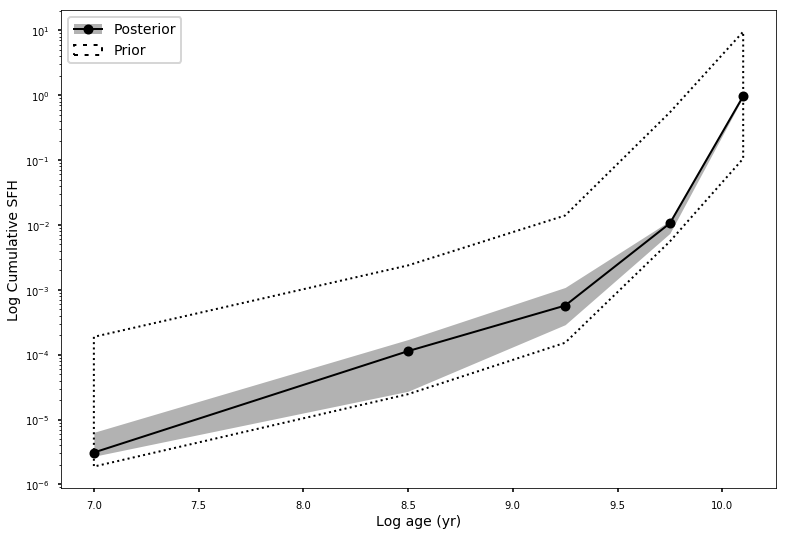

In [30]:
results['M87v2_a1_m1'].plot_cum_sfh();

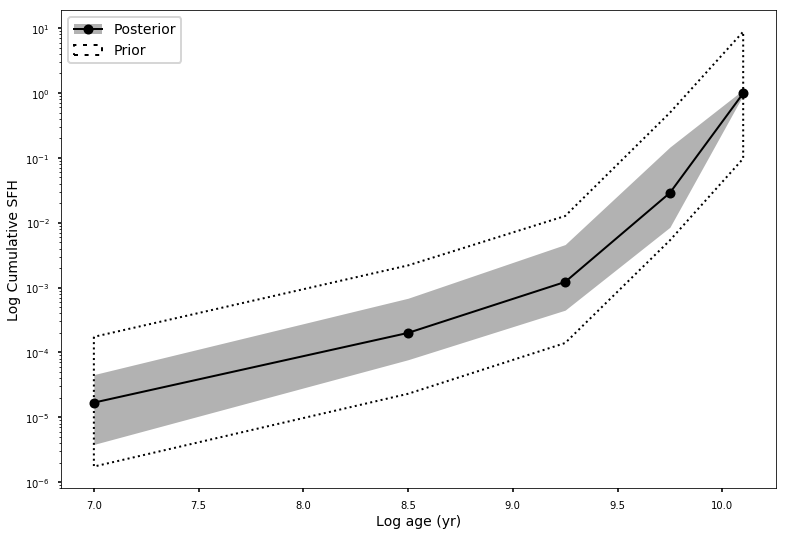

In [32]:
results['M87v2_a1_m6'].plot_cum_sfh();

# M49

In [15]:
for k in [k for k in results.keys() if 'M49' in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

M49_a1_m1 0.03470241072125191 --DONE
M49_b1_m1 0.015888294237868195 --DONE
M49_c1_m1 0.012043221352939781 --DONE
M49_a1_m2 0.004323011116099451 --DONE
M49_b1_m2 0.00850729215045476 --DONE
M49_c1_m2 0.0013971699485182398 --DONE
M49_a1_m3 0.23094606974706267 --DONE
M49_b1_m3 0.11656898479452593 --DONE
M49_c1_m3 0.027349113888163856 --DONE
M49_a1_m4 0.0005298712531498495 --DONE
M49_b1_m4 7.657622205670123e-06 --DONE
M49_c1_m4 6.337456281357845e-05 --DONE
M49_a1_m5 0.4568474315676667 --DONE
M49_b1_m5 0.2444705887641021 --DONE
M49_c1_m5 0.12855980068383133 --DONE
M49_a1_m6 0.15915100534971316
M49_b1_m6 0.16860097311510458
M49_c1_m6 0.13673649624331574


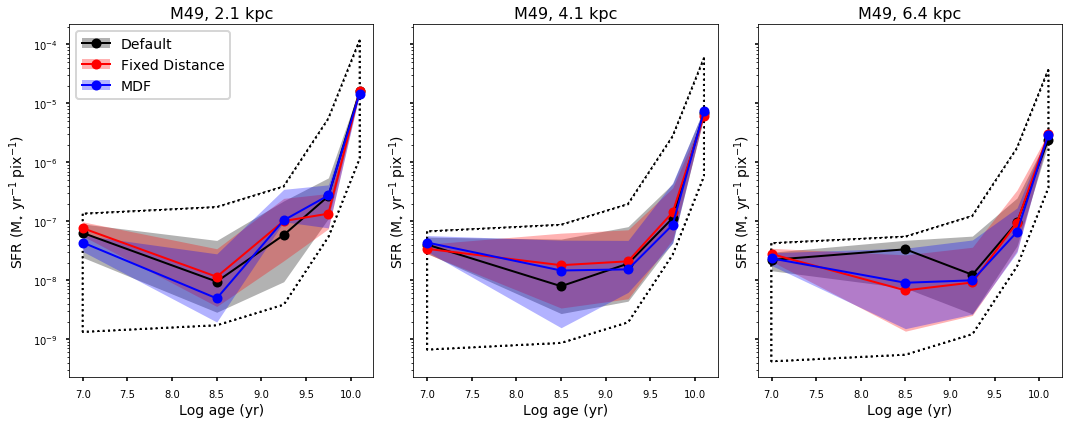

In [16]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6), sharex=True, sharey=True)
for i, r in enumerate(['a','b','c']):
    ax = axes[i]
    ax, lines1 = results[f'M49_{r}1_m1'].plot_sfr(ax=ax, color='k')
    ax, lines2 = results[f'M49_{r}1_m2'].plot_sfr(ax=ax, color='r')
    ax, lines3 = results[f'M49_{r}1_m3'].plot_sfr(ax=ax, color='b')
    if i == 0:
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2])), ('Default', 'Fixed Distance', 'MDF'))
    else:
        ax.get_legend().remove()
    k = f'M49_{r}1_m1'
    ax.set_title(f'M49, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

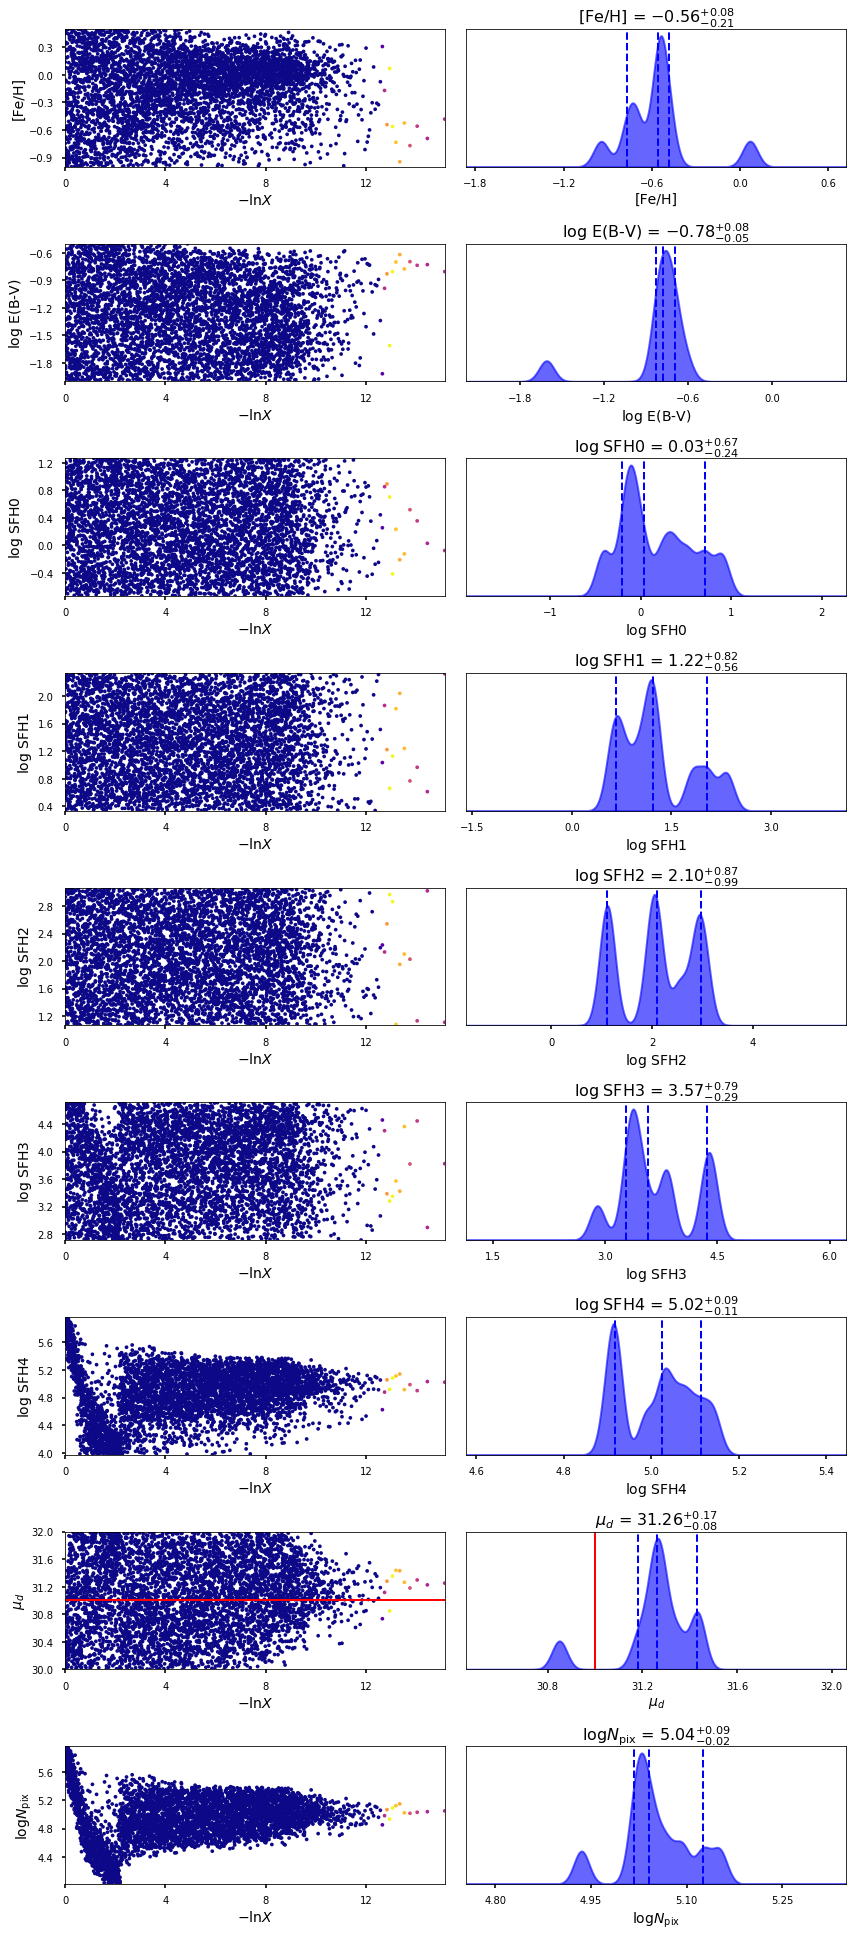

In [34]:
results['M49_b1_m6'].plot_trace();

# NGC 3377

In [17]:
for k in [k for k in results.keys() if 'NGC3377' in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

NGC3377_a1_m1 0.32119924577563097 --DONE
NGC3377_b1_m1 0.11890341918518743
NGC3377_c1_m1 0.14565327869877365 --DONE
NGC3377_a1_m2 0.15422306542711794 --DONE
NGC3377_b1_m2 0.7704898757172032 --DONE
NGC3377_c1_m2 0.08629965210752744
NGC3377_a1_m3 0.03738586151786194 --DONE
NGC3377_b1_m3 0.12399872804087408
NGC3377_c1_m3 0.4082973365404996 --DONE
NGC3377_a1_m4 3.7224875299557425e-05 --DONE
NGC3377_b1_m4 2.012684990404523e-05 --DONE
NGC3377_c1_m4 6.338819844131649e-05 --DONE
NGC3377_a1_m5 0.0013302724022707935 --DONE
NGC3377_b1_m5 0.0015325779260138006 --DONE
NGC3377_c1_m5 0.0020730669559725357 --DONE
NGC3377_a1_m6 0.12319409973812867
NGC3377_b1_m6 0.15670801488613506
NGC3377_c1_m6 0.14666150905839004
NGC3377_a1_m7 0.18232143171803727
NGC3377_b1_m7 0.1818801785271944
NGC3377_c1_m7 0.1815835633290135


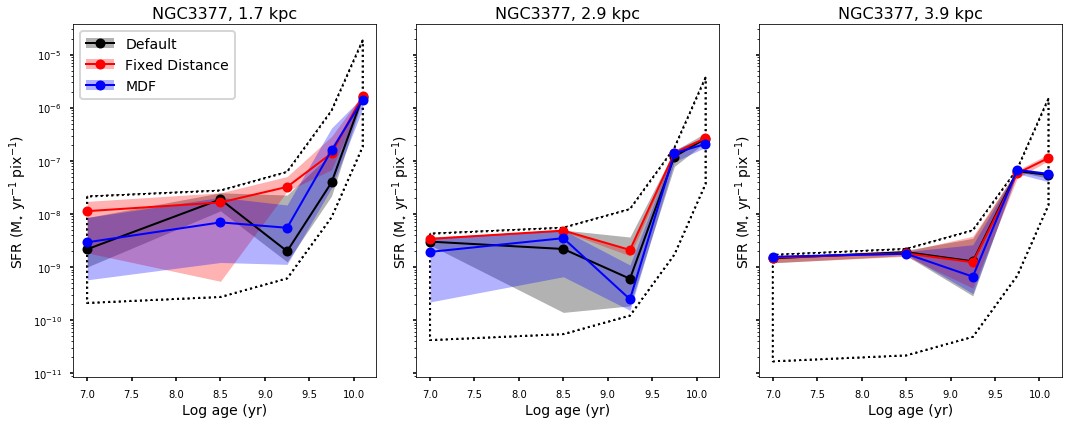

In [18]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6), sharex=True, sharey=True)
for i, r in enumerate(['a','b','c']):
    ax = axes[i]
    ax, lines1 = results[f'NGC3377_{r}1_m1'].plot_sfr(ax=ax, color='k')
    ax, lines2 = results[f'NGC3377_{r}1_m2'].plot_sfr(ax=ax, color='r')
    ax, lines3 = results[f'NGC3377_{r}1_m3'].plot_sfr(ax=ax, color='b')
    if i == 0:
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2])), ('Default', 'Fixed Distance', 'MDF'))
    else:
        ax.get_legend().remove()
    k = f'NGC3377_{r}1_m1'
    ax.set_title(f'NGC3377, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

# NGC4993

In [19]:
for k in [k for k in results.keys() if 'NGC4993' in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

NGC4993_a1_m1 0.00019240811478482556 --DONE
NGC4993_b1_m1 0.0012629243443313953
NGC4993_c1_m1 0.09243522348731403
NGC4993_a1_m2 0.0003423284204018273 --DONE
NGC4993_b1_m2 0.0038244217460032814
NGC4993_c1_m2 0.003426293742904818
NGC4993_a1_m3 0.00027020629609353364 --DONE
NGC4993_b1_m3 0.002770593528310883
NGC4993_c1_m3 0.013519651759281714
NGC4993_a1_m4 0.00011029770963943974 --DONE
NGC4993_b1_m4 3.209880190979675e-06 --DONE
NGC4993_c1_m4 0.005115947172384949
NGC4993_a1_m5 0.00010286195204400883 --DONE
NGC4993_b1_m5 5.29978046870383e-06 --DONE
NGC4993_c1_m5 0.00012207218060211744 --DONE
NGC4993_a1_m6 0.1722325940833116
NGC4993_b1_m6 0.1807764382110122
NGC4993_c1_m6 0.17129992896423119


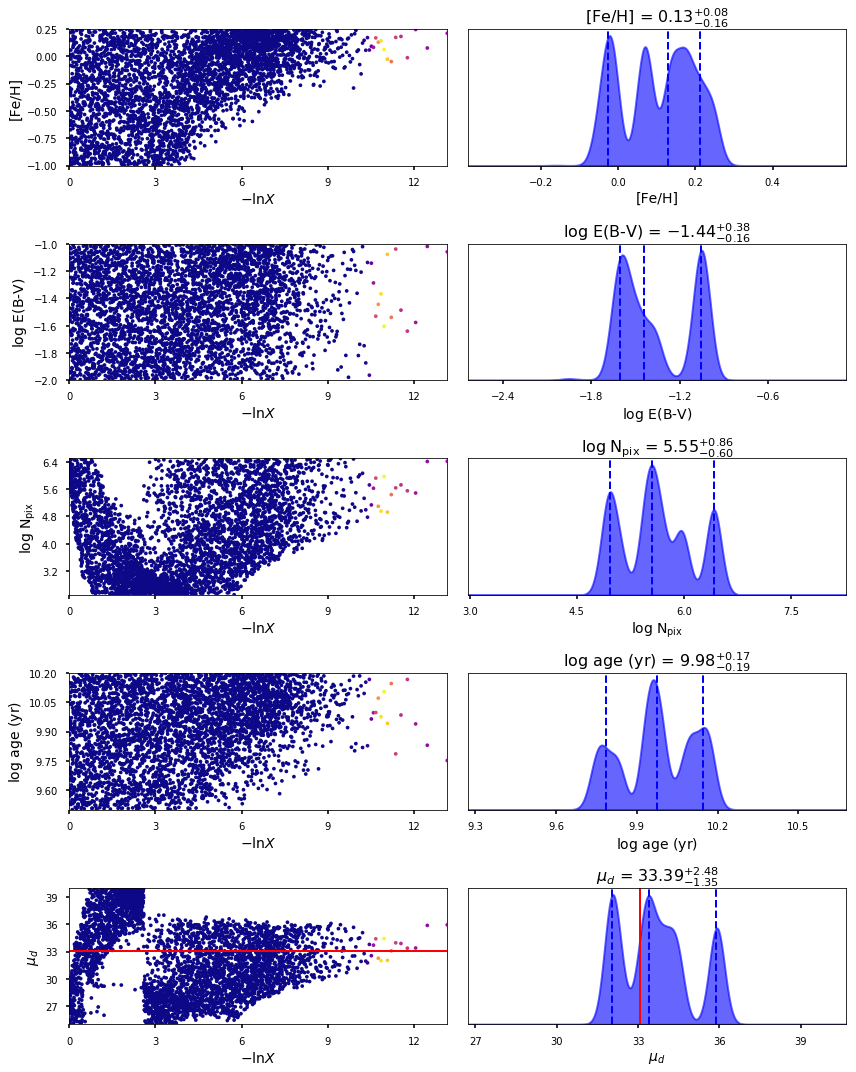

In [26]:
results['NGC4993_a1_m6'].plot_trace();

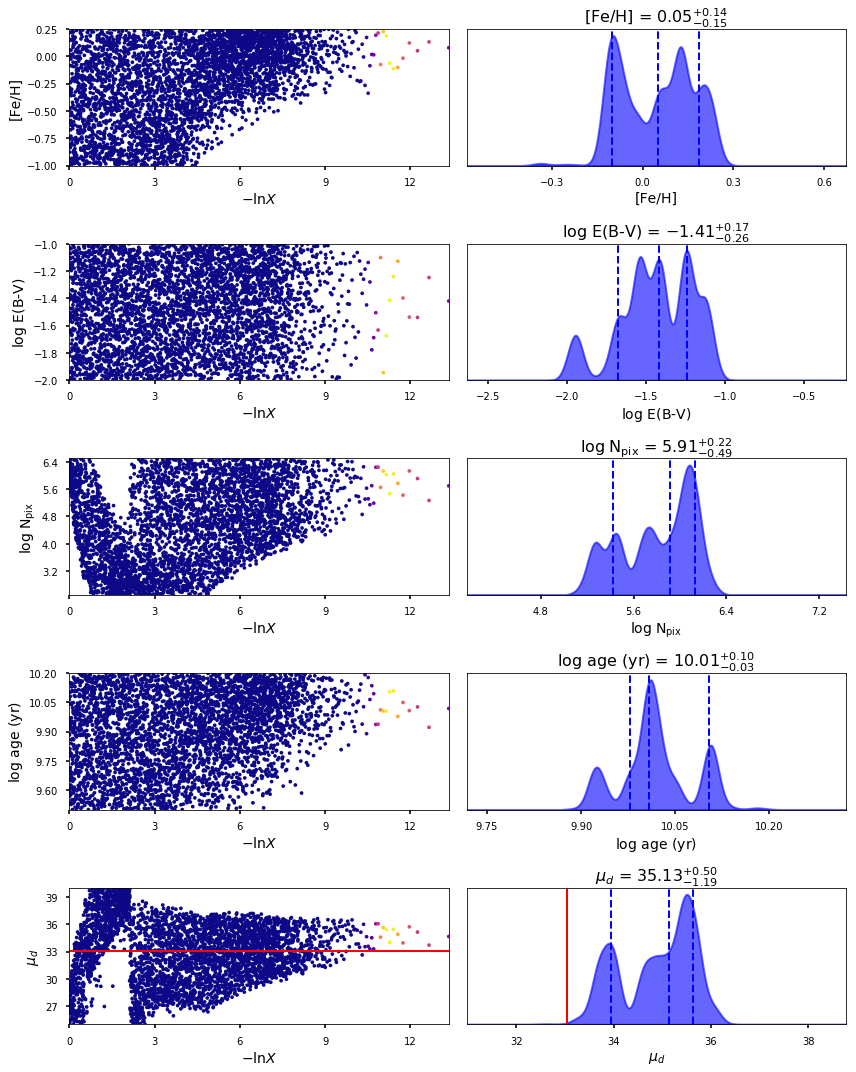

In [27]:
results['NGC4993_b1_m6'].plot_trace();

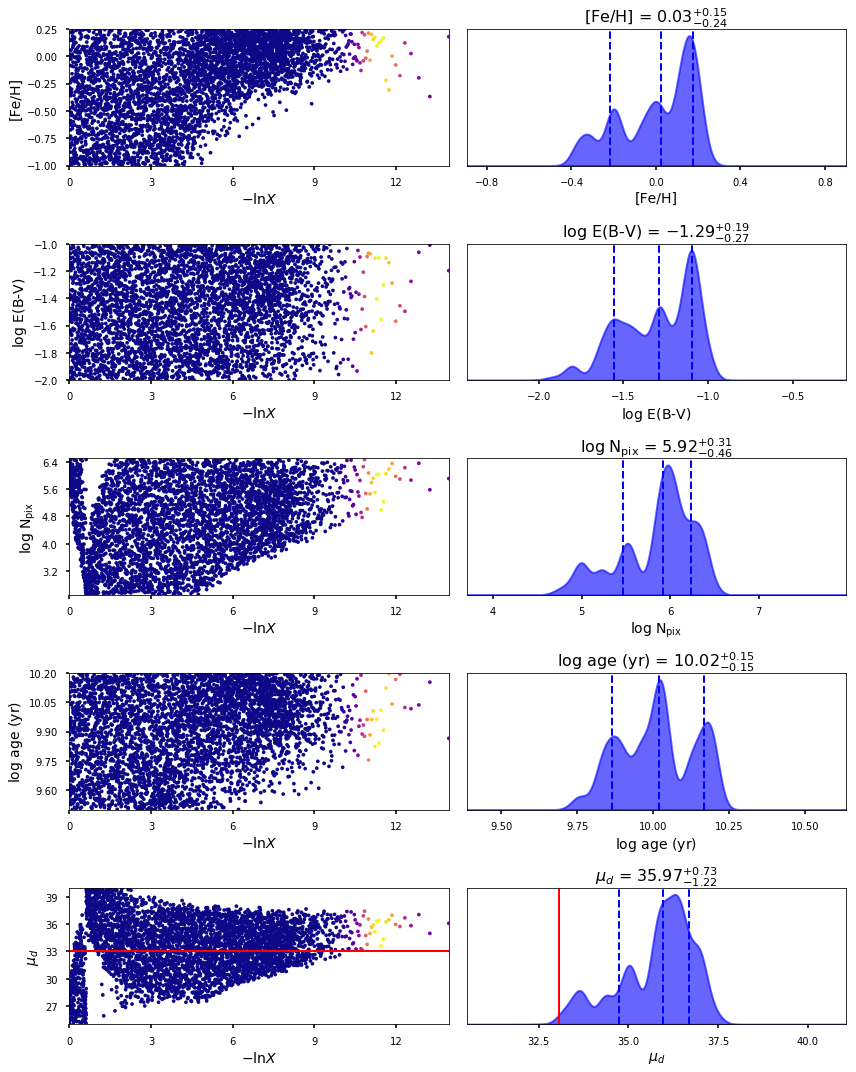

In [28]:
results['NGC4993_c1_m6'].plot_trace();

In [53]:
dmods['NGC4993']

33.05

In [52]:
ppy.distancemodels.dmod_to_mpc(dmods['NGC4993'])

40.73802778041122

In [43]:
for k in ['NGC3377_a1_m5', 'NGC3377_b1_m5', 'NGC3377_c1_m5']:
    pcmds.pop(k)

In [36]:
# for f in drivers['NGC3377'].filters:
#     f._exposure *= 0.5

In [38]:
# sky['NGC3377'] = [s*0.5 for s in sky['NGC3377']]

Modeling best fit for NGC3377_a1_m5
Modeling best fit for NGC3377_b1_m5
Modeling best fit for NGC3377_c1_m5


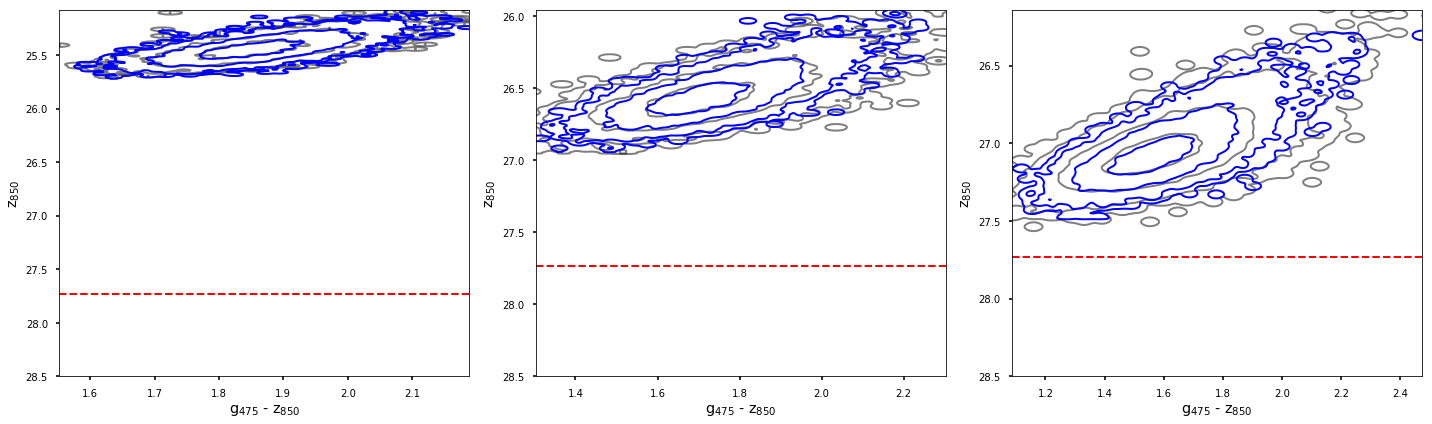

In [44]:
fig, axes = many_pcmd_compares(['NGC3377_a1_m5', 'NGC3377_b1_m5', 'NGC3377_c1_m5'])
for a in axes:
    a.axhline(y=filters['NGC3377'][0].counts_to_mag(sky['NGC3377'][0]), color='r', ls='--')
    a.set_ylim(ymin=28.5)

In [45]:
for k in ['NGC4993_a1_m6', 'NGC4993_b1_m6', 'NGC4993_c1_m6']:
    pcmds.pop(k)

In [46]:
# for f in drivers['NGC4993'].filters:
#     f._exposure *= 0.5

In [47]:
# sky['NGC4993'] = [s*0.5 for s in sky['NGC4993']]

In [48]:
# for k in ['NGC4993_a1_m6', 'NGC4993_b1_m6', 'NGC4993_c1_m6']:
#     m = results[k].best_model.copy()
#     delta_mu = dmods['NGC4993'] - m.dmod 
#     m.set_params(np.array([m._params[0], m._params[1], m._params[2]+0.4*delta_mu, m._params[3], dmods['NGC4993']]))
#     pcmds[k], _ = drivers[g].simulate(m, 256, sky_noise=sky['NGC4993'], dither=False)

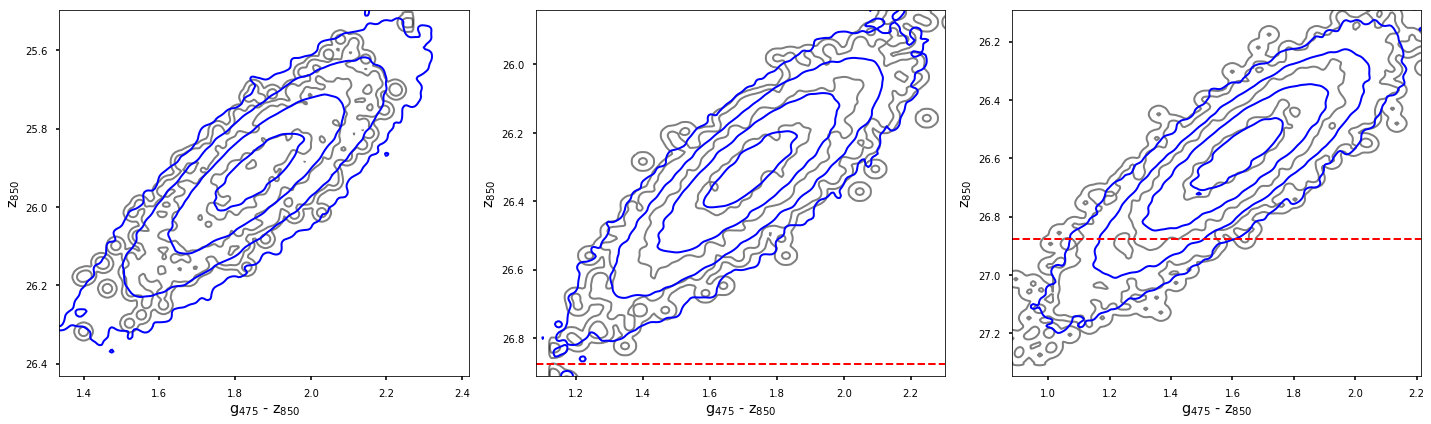

In [49]:
fig, axes = many_pcmd_compares(['NGC4993_a1_m5', 'NGC4993_b1_m5', 'NGC4993_c1_m5'])
for a in axes:
    a.axhline(y=filters['NGC4993'][0].counts_to_mag(sky['NGC4993'][0]), color='r', ls='--')
#     a.set_ylim(ymin=27.4)

Modeling best fit for NGC4993_a1_m6
Modeling best fit for NGC4993_b1_m6
Modeling best fit for NGC4993_c1_m6


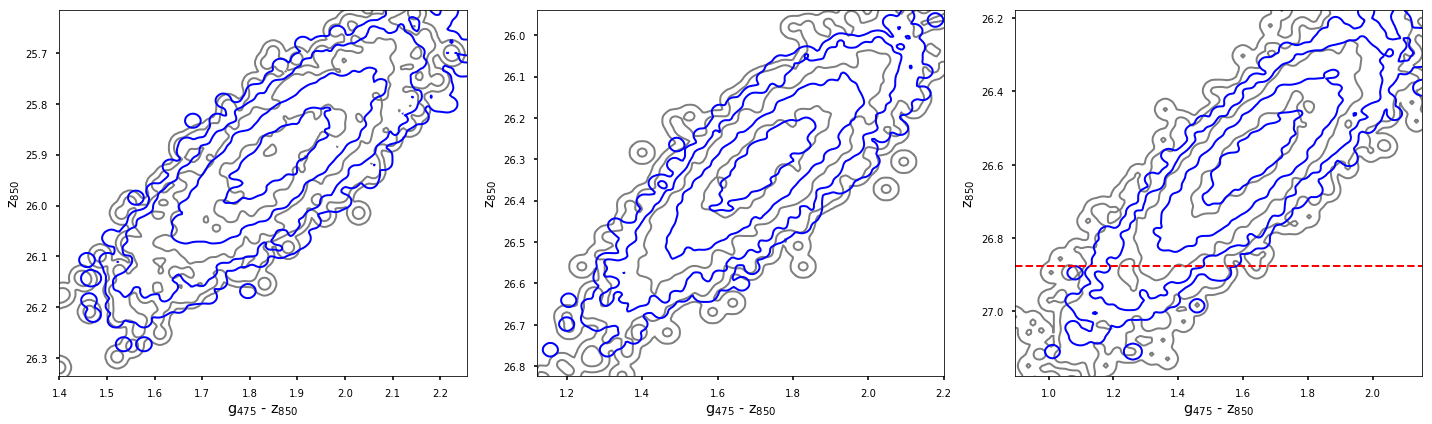

In [29]:
fig, axes = many_pcmd_compares(['NGC4993_a1_m6', 'NGC4993_b1_m6', 'NGC4993_c1_m6'])
for a in axes:
    a.axhline(y=filters['NGC4993'][0].counts_to_mag(sky['NGC4993'][0]), color='r', ls='--')
#     a.set_ylim(ymin=27.4)

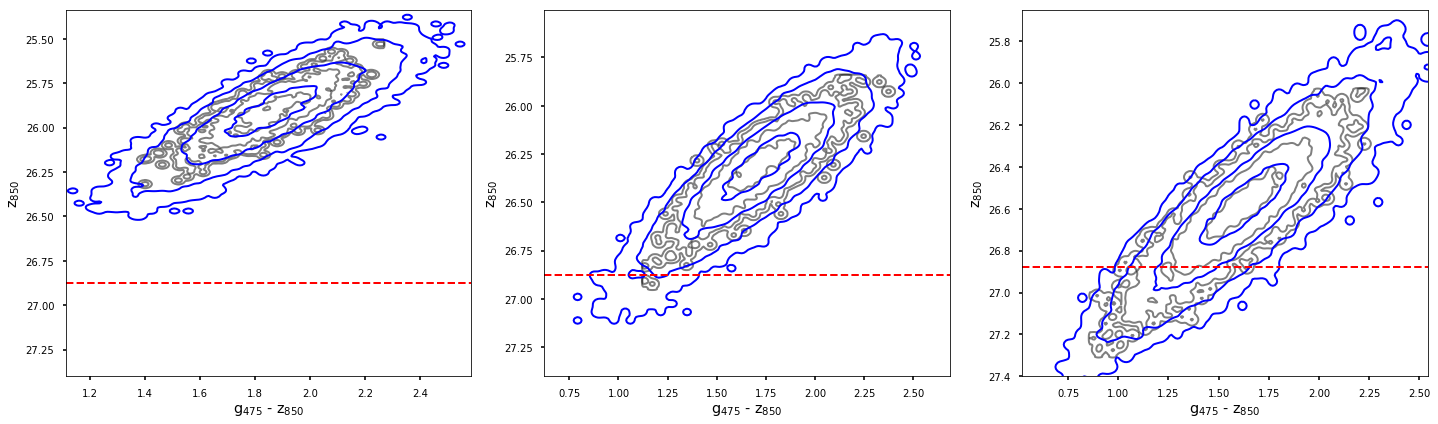

In [59]:
fig, axes = many_pcmd_compares(['NGC4993_a1_m6', 'NGC4993_b1_m6', 'NGC4993_c1_m6'])
for a in axes:
    a.axhline(y=filters['NGC4993'][0].counts_to_mag(sky['NGC4993'][0]), color='r', ls='--')
    a.set_ylim(ymin=27.4)

In [57]:
m._params

[0.24234, -1.2934, 4.8749, 10.2, 33.05]

In [54]:
results['NGC4993_a1_m6'].best_model._params

[0.028729, -1.3443, 4.1821, 10.163, 29.945]

In [50]:
m.logNpix

4.8749